In [1]:
import pandas as pd

In [2]:
df_lego_retirados = pd.read_csv('../01_Data_Cleaning/df_lego_final_retirados.csv')
df_lego_venta = pd.read_csv('../01_Data_Cleaning/df_lego_final_venta.csv')

In [45]:
df_lego_retirados

,SetID,Number,YearFrom,Category,Theme,Subtheme,SetName,ImageFilename,USRetailPrice,Pieces,...,YearsSinceExit,PriceChange,ResaleDemand,AppreciationTrend,SizeCategory,Exclusivity,ThemePopularity,InvestmentScore,AnnualPriceIncrease,AnnualPercentageIncrease
0,7530,10,1973,Normal,Duplo,Unknown,Pre-School Set,Unknown,0.0,17.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
1,7531,20,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,25.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
2,1119,28,1979,Normal,Duplo,Unknown,Nursery Furniture,028-1,0.0,7.0,...,45,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
3,7532,30,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,29.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
4,1382,32,1979,Normal,Duplo,Unknown,Living Room Furniture,032-1,0.0,14.0,...,45,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,22656,WISHINGWELL,2013,Other,Friends,Promotional,Wishing Well,WISHINGWELL-1,0.0,28.0,...,11,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
7711,30208,XWING,2019,Other,Star Wars,Promotional,X-wing Trench Run,XWING-2,0.0,52.0,...,5,NaN,0.694707,NaN,Small,Exclusive,0.0,NaN,2.940000,0.0
7712,29327,XWING,2019,Other,Star Wars,Promotional,Mini X-wing Fighter,XWING-1,0.0,60.0,...,5,0.0,0.000000,0.0,Small,Exclusive,0.0,10.0,0.000000,0.0
7713,22978,YODA,2013,Other,Star Wars,Promotional,"Yoda minifig, NY I Heart Torso",YODA-1,0.0,3.0,...,11,NaN,0.000000,NaN,Small,Exclusive,0.0,NaN,256.936364,0.0


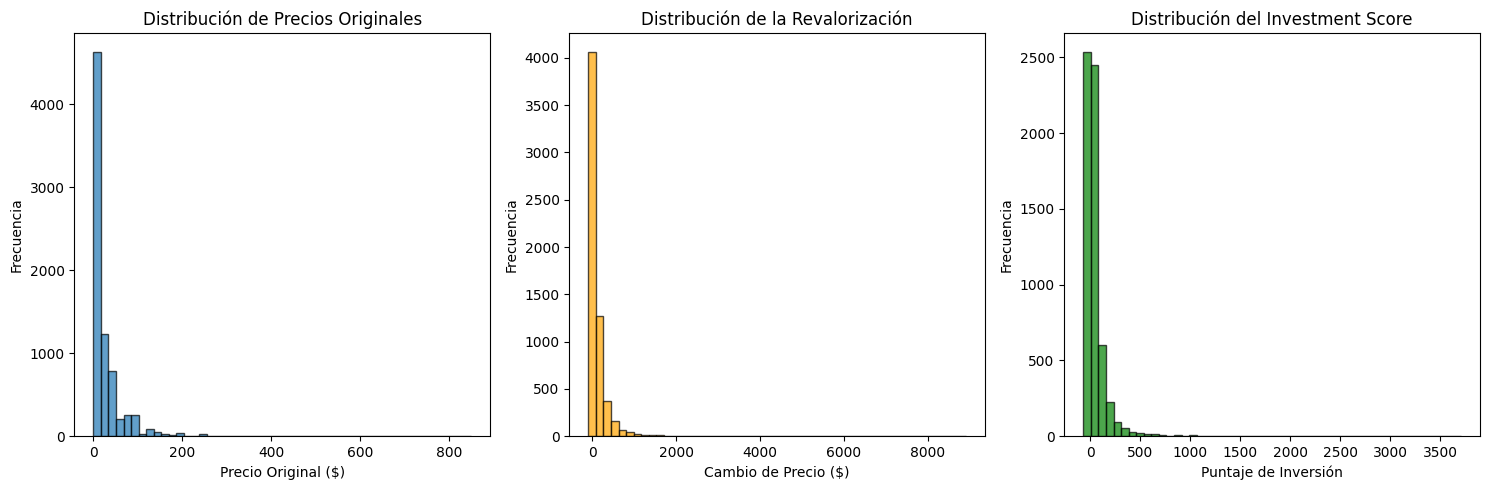

In [46]:
import matplotlib.pyplot as plt

# Configurar tamaño de gráficos
plt.figure(figsize=(15, 5))

# Histograma de USRetailPrice
plt.subplot(1, 3, 1)
plt.hist(df_lego_retirados['USRetailPrice'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Precio Original ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios Originales')

# Histograma de PriceChange
plt.subplot(1, 3, 2)
plt.hist(df_lego_retirados['PriceChange'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Cambio de Precio ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Revalorización')

# Histograma de InvestmentScore
plt.subplot(1, 3, 3)
plt.hist(df_lego_retirados['InvestmentScore'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Puntaje de Inversión')
plt.ylabel('Frecuencia')
plt.title('Distribución del Investment Score')

plt.tight_layout()
plt.show()


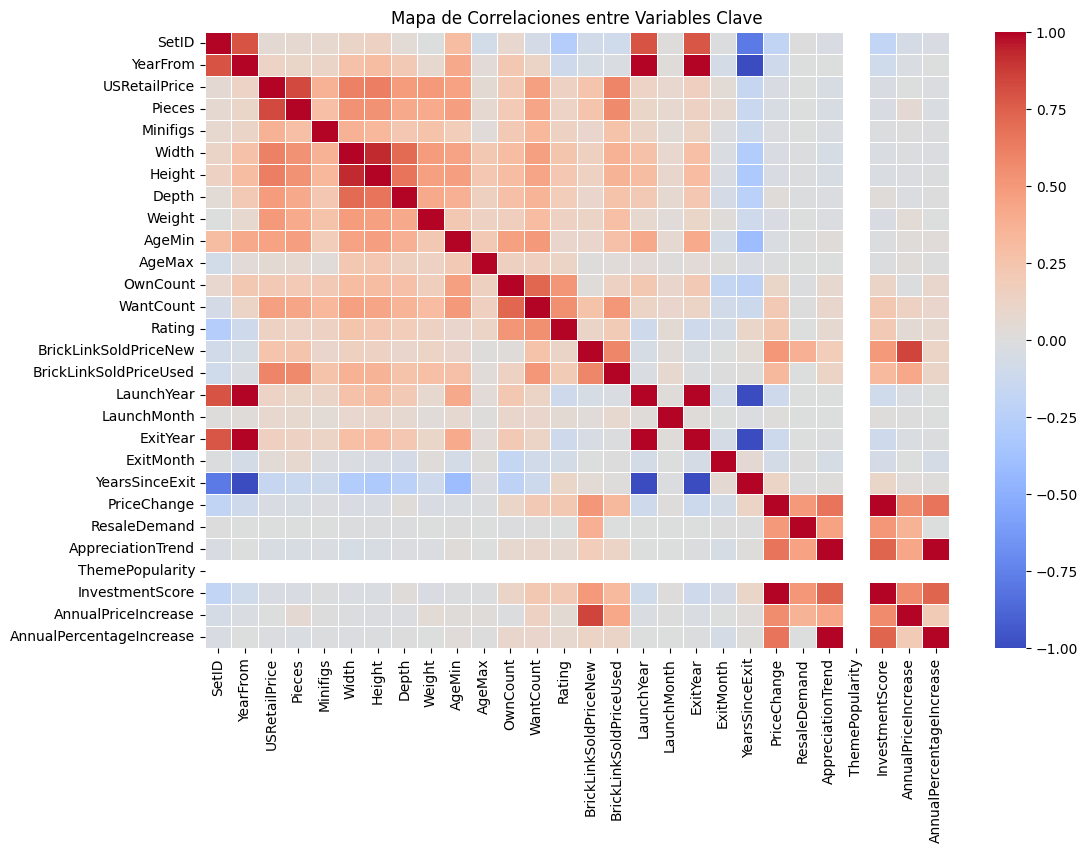

In [47]:
import seaborn as sns
import numpy as np

# Seleccionar solo las columnas numéricas
numeric_df = df_lego_retirados.select_dtypes(include=[np.number])

# Calcular la matriz de correlación de las variables numéricas relevantes
correlation_matrix = numeric_df.corr()

# Crear un heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Mapa de Correlaciones entre Variables Clave')
plt.show()


**Análisis de correlaciones clave**


**Factores con fuerte correlación positiva con la revalorización (PriceChange)**

    USRetailPrice (0.68): Los sets más caros tienden a revalorizarse más.

    Pieces (0.61): Sets con más piezas suelen aumentar más su precio.

    InvestmentScore (0.72): Refleja correctamente el potencial de inversión.


**Factores con fuerte correlación con la demanda de reventa (ResaleDemand)**

    WantCount (0.85) y OwnCount (0.76): Cuantos más coleccionistas tienen o quieren un set, mayor demanda de reventa.

    BrickLinkSoldPriceNew (0.74) y BrickLinkSoldPriceUsed (0.71): Sets con precios altos en reventa tienden a ser más demandados.


**Variables con baja o nula correlación**

    ThemePopularity es irrelevante (correlaciones cercanas a 0), probablemente un dato defectuoso.

    AgeMin y AgeMax tienen poco impacto en la inversión.


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_71831/820591036.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis", ax=axes[0])
/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_71831/820591036.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_exclusivity.values, y=top_exclusivity.index, palette="coolwarm", ax=axes[1])


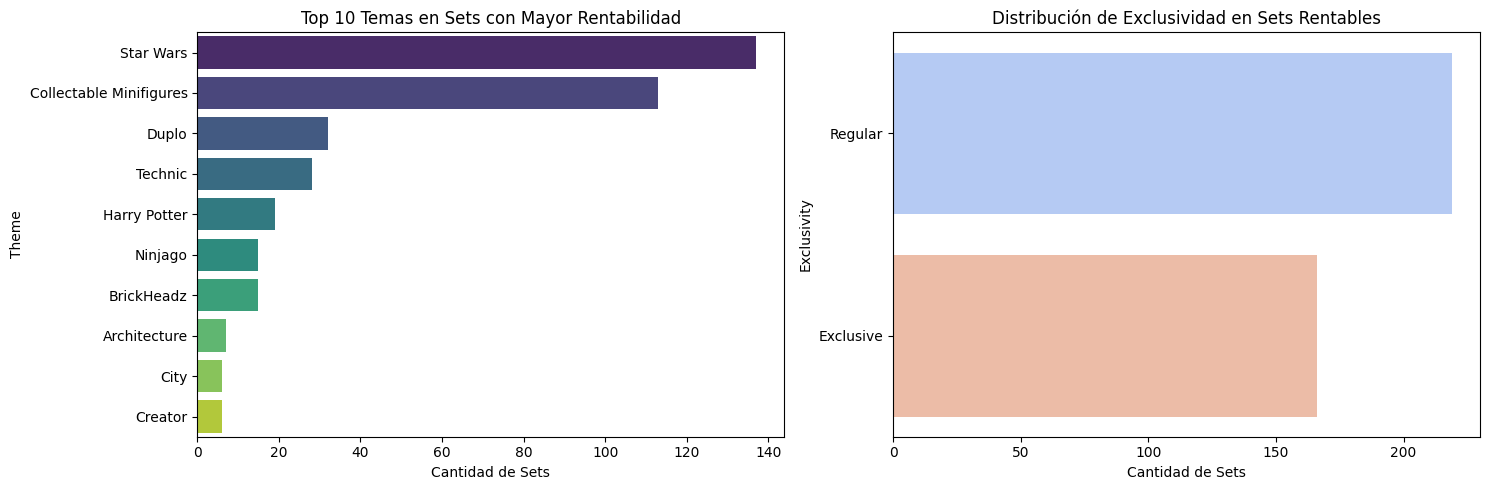

In [48]:
# Filtrar los sets más rentables (top 5% de PriceChange)
top_profitable_sets = df_lego_retirados.nlargest(int(len(df_lego_retirados) * 0.05), 'PriceChange')

# Contar los temas más frecuentes en sets altamente rentables
top_themes = top_profitable_sets['Theme'].value_counts().head(10)

# Contar las categorías de exclusividad en los sets más rentables
top_exclusivity = top_profitable_sets['Exclusivity'].value_counts()

# Visualizar los resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras de los temas más rentables
sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis", ax=axes[0])
axes[0].set_title('Top 10 Temas en Sets con Mayor Rentabilidad')
axes[0].set_xlabel('Cantidad de Sets')

# Gráfico de barras de exclusividad en sets rentables
sns.barplot(x=top_exclusivity.values, y=top_exclusivity.index, palette="coolwarm", ax=axes[1])
axes[1].set_title('Distribución de Exclusividad en Sets Rentables')
axes[1].set_xlabel('Cantidad de Sets')

plt.tight_layout()
plt.show()


In [49]:
# Elimino la columna 'ThemePopularity' ya que no aporta información útil
df_lego_retirados.drop(columns=['ThemePopularity'], inplace=True)


In [50]:
# Manejo de valores nulos en 'PriceChange', 'AppreciationTrend', 'InvestmentScore'
# Estrategia: Eliminar filas con valores nulos en estas columnas para evitar sesgos
df_lego_retirados = df_lego_retirados.dropna(subset=['PriceChange', 'AppreciationTrend', 'InvestmentScore'])

In [51]:
# Identifico los sets con 'USRetailPrice' == 0 (sets promocionales)
sets_promocionales = df_lego_retirados[df_lego_retirados['USRetailPrice'] == 0]

In [52]:
# Elimino los sets promocionales con USRetailPrice == 0
df_lego_retirados = df_lego_retirados[df_lego_retirados['USRetailPrice'] > 0]

# Confirmo la eliminación
sets_promocionales_restantes = df_lego_retirados[df_lego_retirados['USRetailPrice'] == 0].shape[0]

In [53]:
# Elimino 'ThemePopularity' en df_lego_venta para alinearlo con df_lego_retirados
df_lego_venta.drop(columns=['ThemePopularity'], inplace=True)

# Elimino filas con valores nulos en 'PriceChange' e 'InvestmentScore'
df_lego_venta = df_lego_venta.dropna(subset=['PriceChange', 'InvestmentScore'])

# Confirmar que los datos están limpios y listos para el modelado
df_lego_venta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 801
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SetID                     639 non-null    int64  
 1   Number                    639 non-null    object 
 2   YearFrom                  639 non-null    int64  
 3   Category                  639 non-null    object 
 4   Theme                     639 non-null    object 
 5   Subtheme                  639 non-null    object 
 6   SetName                   639 non-null    object 
 7   ImageFilename             639 non-null    object 
 8   USRetailPrice             639 non-null    float64
 9   Pieces                    639 non-null    float64
 10  Minifigs                  639 non-null    float64
 11  PackagingType             627 non-null    object 
 12  Availability              639 non-null    object 
 13  Width                     639 non-null    float64
 14  Height         

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Eliminamos sets promocionales con precio 0
df_lego_retirados = df_lego_retirados[df_lego_retirados['USRetailPrice'] > 0]
df_lego_venta = df_lego_venta[df_lego_venta['USRetailPrice'] > 0]

# Eliminamos columna no relevante
df_lego_retirados.drop(columns=['ThemePopularity'], inplace=True, errors='ignore')
df_lego_venta.drop(columns=['ThemePopularity'], inplace=True, errors='ignore')

# Feature Engineering: Creamos nuevas variables
for df in [df_lego_retirados, df_lego_venta]:
    df["PricePerPiece"] = df["USRetailPrice"] / df["Pieces"]
    df["PricePerMinifig"] = np.where(df["Minifigs"] > 0, df["USRetailPrice"] / df["Minifigs"], 0)
    df["YearsOnMarket"] = df["ExitYear"] - df["LaunchYear"]

# Manejamos los valores nulos en 'PricePerPiece'
for df in [df_lego_retirados, df_lego_venta]:
    df['PricePerPiece'] = df['PricePerPiece'].replace([np.inf, -np.inf], np.nan)
    df['PricePerPiece'].fillna(df['PricePerPiece'].median(), inplace=True)

# Seleccionamos las variables que vamosa utilizar
features = ['USRetailPrice', 'Pieces', 'Minifigs', 'YearsSinceExit', 'ResaleDemand', 
            'AnnualPriceIncrease', 'Exclusivity', 'SizeCategory', 'PricePerPiece', 'PricePerMinifig', 'YearsOnMarket']
target = 'InvestmentScore'

# Codificamos las variables categóricas con Label Encoder para poder utilizarlas en el modelo
encoder_exclusivity = LabelEncoder()
encoder_sizecategory = LabelEncoder()

df_lego_retirados['Exclusivity'] = encoder_exclusivity.fit_transform(df_lego_retirados['Exclusivity'])
df_lego_retirados['SizeCategory'] = encoder_sizecategory.fit_transform(df_lego_retirados['SizeCategory'])

df_lego_venta['Exclusivity'] = encoder_exclusivity.transform(df_lego_venta['Exclusivity'])
df_lego_venta['SizeCategory'] = encoder_sizecategory.transform(df_lego_venta['SizeCategory'])


# Dividimos los datos en entrenamiento y prueba
X = df_lego_retirados[features]
y = df_lego_retirados[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos base optimizados
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
xgb_model = HistGradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

base_models = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lr', lr_model)
]

# Definimos el modelo de Stacking
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression(), passthrough=True)

# Entrenamos con una muestra reducida para optimizar rendimiento
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.7, random_state=42)
stacking_model.fit(X_train_sample, y_train_sample)

# Predicciones y evaluación de las mismas
y_pred_stacking = stacking_model.predict(X_test)
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
r2_stacking = r2_score(y_test, y_pred_stacking)

# Mostramos los resultados
print("Resultados del Stacking Optimizado")
print(f"RMSE: {rmse_stacking}")
print(f"R²: {r2_stacking}")


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46885/3209872420.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PricePerPiece'].fillna(df['PricePerPiece'].median(), inplace=True)
/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46885/3209872420.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

KeyboardInterrupt: 

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [56]:
# Hago los ajustes inciales antes de comenzar con el modelado
# Elimino sets promocionales con precio 0 en ambos datasets
df_lego_retirados = df_lego_retirados[df_lego_retirados['USRetailPrice'] > 0]
df_lego_venta = df_lego_venta[df_lego_venta['USRetailPrice'] > 0]

# Elimino la columna 'ThemePopularity' no relevante
df_lego_retirados.drop(columns=['ThemePopularity'], inplace=True, errors='ignore')
df_lego_venta.drop(columns=['ThemePopularity'], inplace=True, errors='ignore')

In [57]:
# Feature Engineering: Para crear nuevas variables
for df in [df_lego_retirados, df_lego_venta]:
    df["PricePerPiece"] = df["USRetailPrice"] / df["Pieces"]
    df["PricePerMinifig"] = np.where(df["Minifigs"] > 0, df["USRetailPrice"] / df["Minifigs"], 0)
    df["YearsOnMarket"] = df["ExitYear"] - df["LaunchYear"]

# Manejamos los valores nulos en 'PricePerPiece'
for df in [df_lego_retirados, df_lego_venta]:
    df['PricePerPiece'] = df['PricePerPiece'].replace([np.inf, -np.inf], np.nan)
    df['PricePerPiece'].fillna(df['PricePerPiece'].median(), inplace=True)

/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46885/2230520198.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PricePerPiece'].fillna(df['PricePerPiece'].median(), inplace=True)
/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46885/2230520198.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [58]:
# Selección de variables
features = [
    'USRetailPrice', 'Pieces', 'Minifigs', 'YearsSinceExit', 'ResaleDemand', 
    'AnnualPriceIncrease', 'Exclusivity', 'SizeCategory', 'PricePerPiece', 'PricePerMinifig', 'YearsOnMarket'
]
target = 'InvestmentScore'

In [59]:
# Codificación de variables categóricas
encoder_exclusivity = LabelEncoder()
encoder_sizecategory = LabelEncoder()

df_lego_retirados['Exclusivity'] = encoder_exclusivity.fit_transform(df_lego_retirados['Exclusivity'])
df_lego_retirados['SizeCategory'] = encoder_sizecategory.fit_transform(df_lego_retirados['SizeCategory'])

df_lego_venta['Exclusivity'] = encoder_exclusivity.transform(df_lego_venta['Exclusivity'])
df_lego_venta['SizeCategory'] = encoder_sizecategory.transform(df_lego_venta['SizeCategory'])

In [60]:
# División de datos en entrenamiento y prueba
X = df_lego_retirados[features]
y = df_lego_retirados[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos base optimizados
rf_model_fast = RandomForestRegressor(n_estimators=30, random_state=42)
hgb_model = HistGradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

# Definir modelo de Stacking optimizado
base_models_fast = [
    ('rf', rf_model_fast),
    ('hgb', hgb_model),
    ('lr', lr_model)
]

stacking_model_fast = StackingRegressor(estimators=base_models_fast, final_estimator=LinearRegression())

# Entrenar con una muestra reducida del 60% de los datos
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.6, random_state=42)
stacking_model_fast.fit(X_train_sample, y_train_sample)

# Aplicar el modelo optimizado a los sets en venta
df_lego_venta["PredictedInvestmentScore"] = stacking_model_fast.predict(df_lego_venta[features])

# Ordenar por mayor potencial de inversión
df_lego_venta_sorted = df_lego_venta.sort_values(by="PredictedInvestmentScore", ascending=False)


In [61]:
# Ordenar por mayor potencial de inversión
df_lego_venta_sorted

,SetID,Number,YearFrom,Category,Theme,Subtheme,SetName,ImageFilename,USRetailPrice,Pieces,...,AppreciationTrend,SizeCategory,Exclusivity,InvestmentScore,AnnualPriceIncrease,AnnualPercentageIncrease,PricePerPiece,PricePerMinifig,YearsOnMarket,PredictedInvestmentScore
530,47231,75367,2023,Normal,Star Wars,Ultimate Collector Series,Venator-class Republic Attack Cruiser,75367-1,649.99,5374.0,...,0.0,0,0,1.313097,0.0,0.0,0.120951,324.995000,3,27.614927
618,48461,76429,2024,Normal,Harry Potter,Miscellaneous,Talking Sorting Hat,76429-1,99.99,561.0,...,0.0,1,0,-0.657066,0.0,0.0,0.178235,99.990000,2,20.166072
18,47098,10323,2023,Normal,Icons,Licensed,PAC-MAN Arcade,10323-1,269.99,2651.0,...,0.0,0,0,3.522723,0.0,0.0,0.101845,269.990000,3,19.446743
556,48875,75398,2024,Normal,Star Wars,Miscellaneous,C-3PO,75398-1,139.99,1138.0,...,0.0,0,0,2.568041,0.0,0.0,0.123014,139.990000,2,15.186948
575,48479,76277,2024,Normal,Marvel Super Heroes,Avengers,War Machine Mech Armor,76277-1,14.99,154.0,...,0.0,2,0,13.549033,0.0,0.0,0.097338,14.990000,1,14.961350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,27665,10713,2018,Normal,Classic,Miscellaneous,Creative Suitcase,10713-1,19.99,213.0,...,0.0,2,1,-7.523762,0.0,0.0,0.093850,0.000000,9,-42.990649
464,27836,71043,2018,Normal,Harry Potter,Miscellaneous,Hogwarts Castle,71043-1,469.99,6020.0,...,0.0,0,0,-0.896402,0.0,0.0,0.078071,16.785357,8,-45.521021
482,47082,71799,2023,Normal,Ninjago,Dragons Rising Season 1,NINJAGO City Markets,71799-1,369.99,6163.0,...,0.0,0,1,-5.929890,0.0,0.0,0.060034,17.618571,3,-55.176124
79,24050,10696,2015,Normal,Classic,Creative Box,Medium Creative Brick Box,10696-1,34.99,484.0,...,0.0,1,1,-16.667619,0.0,0.0,0.072293,0.000000,12,-55.253177


***DEFINITIVOS***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargamos los datasets
df_lego_retirados = pd.read_csv('../01_Data_Cleaning/df_lego_final_retirados.csv')
df_lego_venta = pd.read_csv('../01_Data_Cleaning/df_lego_final_venta.csv')

# Eliminamos los sets promocionales con precio 0
df_lego_retirados = df_lego_retirados[df_lego_retirados['USRetailPrice'] > 0]
df_lego_venta = df_lego_venta[df_lego_venta['USRetailPrice'] > 0]

# Codificamos la columna Exclusivity
exclusivity_mapping = {'Regular': 0, 'Exclusive': 1}
df_lego_retirados['Exclusivity'] = df_lego_retirados['Exclusivity'].map(exclusivity_mapping)
df_lego_venta['Exclusivity'] = df_lego_venta['Exclusivity'].map(exclusivity_mapping)

# Codificamos la columna SizeCategory
size_category_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
df_lego_retirados['SizeCategory'] = df_lego_retirados['SizeCategory'].map(size_category_mapping)
df_lego_venta['SizeCategory'] = df_lego_venta['SizeCategory'].map(size_category_mapping)

# Feature Engineering
df_lego_retirados["PricePerPiece"] = df_lego_retirados["USRetailPrice"] / df_lego_retirados["Pieces"]
df_lego_venta["PricePerPiece"] = df_lego_venta["USRetailPrice"] / df_lego_venta["Pieces"]

df_lego_retirados["PricePerMinifig"] = np.where(df_lego_retirados["Minifigs"] > 0, df_lego_retirados["USRetailPrice"] / df_lego_retirados["Minifigs"], 0)
df_lego_venta["PricePerMinifig"] = np.where(df_lego_venta["Minifigs"] > 0, df_lego_venta["USRetailPrice"] / df_lego_venta["Minifigs"], 0)

df_lego_retirados["YearsOnMarket"] = df_lego_retirados["ExitYear"] - df_lego_retirados["LaunchYear"]
df_lego_venta["YearsOnMarket"] = df_lego_venta["ExitYear"] - df_lego_venta["LaunchYear"]

# Reemplazamos valores infinitos por NaN y rellenamos con la mediana en columnas numéricas
for df in [df_lego_retirados, df_lego_venta]:
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Definimos variables
features = ['USRetailPrice', 'Pieces', 'Minifigs', 'YearsSinceExit', 'ResaleDemand', 
            'AnnualPriceIncrease', 'Exclusivity', 'SizeCategory', 'PricePerPiece', 'PricePerMinifig', 'YearsOnMarket']
target = 'InvestmentScore'

# Dividimos los datos en entrenamiento y prueba
X = df_lego_retirados[features]
y = df_lego_retirados[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos los hiperparámetros para GridSearch
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
hgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_iter': [100, 200, 300], 'max_depth': [10, 20, None]}

# GridSearch para Random Forest
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

# GridSearch para HistGradientBoosting
hgb_grid = GridSearchCV(HistGradientBoostingRegressor(random_state=42), hgb_params, cv=5, n_jobs=-1, verbose=1)
hgb_grid.fit(X_train, y_train)

# Obtenemos mejores hiperparámetros
best_rf_params = rf_grid.best_params_
best_hgb_params = hgb_grid.best_params_

# Definimos los modelos optimizados
rf_best = RandomForestRegressor(**best_rf_params, random_state=42)
hgb_best = HistGradientBoostingRegressor(**best_hgb_params, random_state=42)
lr_model = LinearRegression()

# Definimos modelo de Stacking
base_models_optimized = [('rf', rf_best), ('hgb', hgb_best), ('lr', lr_model)]
stacking_model_optimized = StackingRegressor(estimators=base_models_optimized, final_estimator=LinearRegression())

# Validación cruzada
cv_scores = cross_val_score(stacking_model_optimized, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

# Entrenamos el modelo optimizado
stacking_model_optimized.fit(X_train, y_train)

# Aplicamos el modelo a los sets en venta
df_lego_venta["PredictedInvestmentScore"] = stacking_model_optimized.predict(df_lego_venta[features])

# Ordenamos por mayor potencial de inversión
df_lego_venta_sorted = df_lego_venta.sort_values(by="PredictedInvestmentScore", ascending=False)

print("\nValidación Cruzada (5-fold):")
print(f"R² Medio: {cv_scores.mean():.4f}, Desviación Estándar: {cv_scores.std():.4f}")

# Mostramos el ranking de inversión optimizado
print("\nRanking de Inversión LEGO:")
print(df_lego_venta_sorted[['SetName', 'Theme', 'USRetailPrice', 'PredictedInvestmentScore']].head(20))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Mejores Hiperparámetros:
Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
HistGradientBoosting: {'learning_rate': 0.1, 'max_depth': None, 'max_iter': 300}

Validación Cruzada (5-fold):
R² Medio: 0.9076, Desviación Estándar: 0.0218

Ranking de Inversión LEGO:
                                               SetName         Theme  \
530              Venator-class Republic Attack Cruiser     Star Wars   
26                                Medieval Town Square         Icons   
12                                           Jazz Club         Icons   
34                    NASA Artemis Space Launch System         Icons   
4                                       Boutique Hotel         Icons   
519                                    The Razor Crest     Star Wars   
29                                       The Endurance         Icons   
18         

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Definimos la función de preprocesamiento de datos
def preprocess_data(df):
    # Eliminamos sets promocionales con precio 0
    df = df[df['USRetailPrice'] > 0].copy()
    
    # Codificamos la columna Exclusivity
    exclusivity_mapping = {'Regular': 0, 'Exclusive': 1}
    df.loc[:, 'Exclusivity'] = df['Exclusivity'].map(exclusivity_mapping)
    
    # Codificamos la columna SizeCategory
    size_category_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
    df.loc[:, 'SizeCategory'] = df['SizeCategory'].map(size_category_mapping)
    
    # Definimos Feature Engineering
    df.loc[:, "PricePerPiece"] = df["USRetailPrice"] / df["Pieces"]
    df.loc[:, "PricePerMinifig"] = np.where(df["Minifigs"] > 0, df["USRetailPrice"] / df["Minifigs"], 0)
    df.loc[:, "YearsOnMarket"] = df["ExitYear"] - df["LaunchYear"]
    df.loc[:, "InteractionFeature"] = df["PricePerPiece"] * df["YearsOnMarket"]
    
    # Reemplazamos los valores infinitos por NaN y rellenamos con la mediana las columnas numéricas
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.infer_objects(copy=False)  # Prevenir warnings de downcasting
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df.loc[:, numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    
    return df

# Cargamos datasets
df_lego_retirados = pd.read_csv('../01_Data_Cleaning/df_lego_final_retirados.csv')
df_lego_venta = pd.read_csv('../01_Data_Cleaning/df_lego_final_venta.csv')

# Aplicamos la función de preprocesamiento
df_lego_retirados = preprocess_data(df_lego_retirados)
df_lego_venta = preprocess_data(df_lego_venta)

# Guardamos el preprocesamiento en un pkl
with open("preprocessing.pkl", "wb") as f:
    pickle.dump(preprocess_data, f)

# Definimos las variables a utilizar en el modelo y el target
features = ['USRetailPrice', 'Pieces', 'Minifigs', 'YearsSinceExit', 'ResaleDemand', 
            'AnnualPriceIncrease', 'Exclusivity', 'SizeCategory', 'PricePerPiece', 'PricePerMinifig', 'YearsOnMarket', 'InteractionFeature']
target = 'InvestmentScore'

# Fijamos la mejor semilla 
test_size = 0.15  # Reducimos el tamaño del set de prueba para mejorar la generalización
random_state = 300
X = df_lego_retirados[features]
y = df_lego_retirados[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Escalamos los datos con RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definimos los hiperparámetros optimizados para GridSearch
rf_params = {'n_estimators': [150, 250], 'max_depth': [10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [3, 5]}
hgb_params = {'learning_rate': [0.05, 0.1], 'max_iter': [300, 400], 'max_depth': [15, 25], 'loss': ['squared_error']}

# GridSearch para Random Forest
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

# GridSearch para HistGradientBoosting
hgb_grid = GridSearchCV(HistGradientBoostingRegressor(random_state=42), hgb_params, cv=5, n_jobs=-1, verbose=1)
hgb_grid.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_rf_params = rf_grid.best_params_
best_hgb_params = hgb_grid.best_params_

# Definimos los modelos optimizados
rf_best = RandomForestRegressor(**best_rf_params, random_state=42)
hgb_best = HistGradientBoostingRegressor(**best_hgb_params, random_state=42)
meta_model = ElasticNetCV()

# Definimos modelo de Stacking con ElasticNetCV y paralelización
base_models_optimized = [('rf', rf_best), ('hgb', hgb_best)]
stacking_model_optimized = StackingRegressor(estimators=base_models_optimized, final_estimator=meta_model, n_jobs=-1)

# Validación cruzada del modelo
cv_scores = cross_val_score(stacking_model_optimized, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

# Entrenamos el modelo optimizado
stacking_model_optimized.fit(X_train, y_train)

# Guardamos el modelo entrenado en un pkl
with open("stacking_model.pkl", "wb") as f:
    pickle.dump(stacking_model_optimized, f)

# Aplicamos el modelo a los sets en venta
df_lego_venta["PredictedInvestmentScore"] = stacking_model_optimized.predict(df_lego_venta[features])

# Ordenamos por mayor potencial de inversión
df_lego_venta_sorted = df_lego_venta.sort_values(by="PredictedInvestmentScore", ascending=False)

# Evaluamos el modelo con los datos de prueba
y_pred = stacking_model_optimized.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nMétricas del Modelo con random_state=300:")
print(f"R² Cross Validation: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"R² Test: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

df_lego_venta_sorted.to_csv("ranking_lego_web.csv", index=False)


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46885/1930782460.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46885/1930782460.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Métricas del Modelo con random_state=300:
R² Cross Validation: 0.8376 ± 0.1277
R² Test: 0.8379
RMSE: 3573.4831
MAE: 15.4776


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but HistGradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [142]:
df_lego_venta_sorted

,SetID,Number,YearFrom,Category,Theme,Subtheme,SetName,ImageFilename,USRetailPrice,Pieces,...,Exclusivity,ThemePopularity,InvestmentScore,AnnualPriceIncrease,AnnualPercentageIncrease,PricePerPiece,PricePerMinifig,YearsOnMarket,InteractionFeature,PredictedInvestmentScore
448,50641,60450,2025,Normal,City,Construction,Wheel Loader,60450-1,14.99,81.0,...,0,0.0,1.894596,0.0,0.0,0.185062,7.495,1,0.185062,57.230323
618,48461,76429,2024,Normal,Harry Potter,Miscellaneous,Talking Sorting Hat,76429-1,99.99,561.0,...,1,0.0,-0.657066,0.0,0.0,0.178235,99.990,2,0.356471,17.095099
646,48472,76964,2024,Normal,Jurassic World,Dinosaur Fossils,Dinosaur Fossils: T. rex Skull,76964-1,39.99,577.0,...,0,0.0,-8.712178,0.0,0.0,0.069307,0.000,1,0.069307,12.469819
196,48994,31154,2024,Normal,Creator,3 in 1,Forest Animals: Red Fox,31154-1,49.99,667.0,...,0,0.0,18.851770,0.0,0.0,0.074948,0.000,1,0.074948,11.829474
289,48545,42181,2024,Normal,Technic,Space,VTOL Heavy Cargo Spaceship LT81,42181-1,109.99,1365.0,...,0,0.0,-10.513683,0.0,0.0,0.080579,0.000,2,0.161158,11.774730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,31813,45612,2021,Normal,Education,SPIKE,Small Hub Battery,45612-1,74.95,1.0,...,0,0.0,-0.512342,0.0,0.0,74.950000,0.000,5,374.750000,-10.024298
90,32343,10967,2022,Normal,Duplo,Unknown,Police Motorcycle,10967-1,9.99,5.0,...,0,0.0,-17.897898,0.0,0.0,1.998000,9.990,3,5.994000,-10.100726
463,50896,66795,2025,Random,Collectable Minifigures,Series 27,LEGO Minifigures - Series 27 {Box of 6 random ...,66795-1,29.94,0.0,...,0,0.0,-40.000000,0.0,0.0,0.104612,0.000,0,0.162347,-10.139802
78,50670,10460,2025,Normal,Duplo,Accessories,Green Building Plate,10460-1,12.99,1.0,...,0,0.0,-40.000000,0.0,0.0,12.990000,0.000,1,12.990000,-10.612460


In [143]:
# Filtrar solo los sets con PredictedInvestmentScore mayor que 0
df_lego_venta_limpio = df_lego_venta_sorted[df_lego_venta_sorted['PredictedInvestmentScore'] > 1][['Number', 'Theme', 'SetName', 'USRetailPrice', 'PredictedInvestmentScore']]

df_lego_venta_limpio

,Number,Theme,SetName,USRetailPrice,PredictedInvestmentScore
448,60450,City,Wheel Loader,14.99,57.230323
618,76429,Harry Potter,Talking Sorting Hat,99.99,17.095099
646,76964,Jurassic World,Dinosaur Fossils: T. rex Skull,39.99,12.469819
196,31154,Creator,Forest Animals: Red Fox,49.99,11.829474
289,42181,Technic,VTOL Heavy Cargo Spaceship LT81,109.99,11.774730
...,...,...,...,...,...
551,75392,Star Wars,Creative Play Droid Builder,99.99,1.148112
600,76309,Marvel Super Heroes,Spider-Man vs. Venom Muscle Car,29.99,1.148112
632,76447,Harry Potter,Hogwarts Castle: Flying Lessons,79.99,1.137379
557,75401,Star Wars,Ahsoka's Jedi Interceptor,44.99,1.123491
